In [1]:
from netCDF4 import Dataset, date2num, num2date
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sFile = '../../../downloads/ASCAT_data/BuoyLocs/T_0N_140W_ASCAT_2007_01_01_T07.20.41_to_2012_12_30_T07.09.56.nc'
bFile = '../../../downloads/Buoy/extractedGZ2/WINDS/T_00N_140W_COARE3p5_2000.nc'
ds1 = Dataset(sFile)
ds2 = Dataset(bFile)

ds1.variables.keys(), ds2.variables.keys()

(dict_keys(['time', 'lon', 'lat', 'wspd', 'wdir']),
 dict_keys(['time', 'U10N', 'U10', 'U10_direction', 'U10N2', 'U102', 'U10_direction2', 'U10N2_x', 'U10N2_y', 'SST', 'RH', 'AIRT']))

In [9]:
uwnd_s = np.array(ds1.variables['wspd'])
stime = np.array(ds1.variables['time'])
stimeUnits = ds1.variables['time'].units
cftimes = num2date(stime, stimeUnits)
sDateTime = np.array([datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes])
sDateTime -= (datetime(1999,1,1) - datetime(1990,1,1))  ### This is correction I DID error in selectASCATWithLatLon2.py file

uwnd_b = np.array(ds2.variables['U10N'])
btime = np.array(ds2.variables['time'])
btimeUnits = ds2.variables['time'].units
cftimes = num2date(btime, btimeUnits)
bDateTime = np.array([datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes])

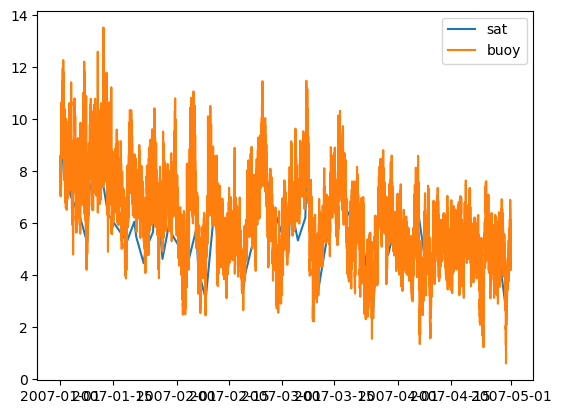

In [13]:
uwnd_s[abs(uwnd_s)>100] = float('nan')
uwnd_b[abs(uwnd_b)>100] = float('nan')

mask1 = sDateTime <datetime(2007,5,1)
mask2 = bDateTime <datetime(2007,5,1)\


plt.plot(sDateTime[mask1], uwnd_s[mask1], label='sat')

plt.plot(bDateTime[mask2], uwnd_b[mask2], label='buoy')

plt.legend()

In [11]:
sDateTime[0]

datetime.datetime(2007, 1, 1, 7, 20, 41)